<a href="https://colab.research.google.com/github/KeithKimani/-EDA-with-Pandas---Cumulative-Lab/blob/main/DSF_FT10_Remote_Label_Encoding_vs_One_Hot_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Why?

- In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values)

- We need to convert each text category to numbers in order for the machine to process them using mathematical equations

- For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc

- Few algorithms such as CATBOOST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

- Neural networks, which is a base of deep-learning, expects input values to be numerical.

- There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set.

- We will focus on 2 main methods: One-Hot-Encoding and Label-Encoder. Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

NYC Airbnb Dataset

The dataset contains information on hosts, geographical availability and various metrics

Dataset Link = https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=download

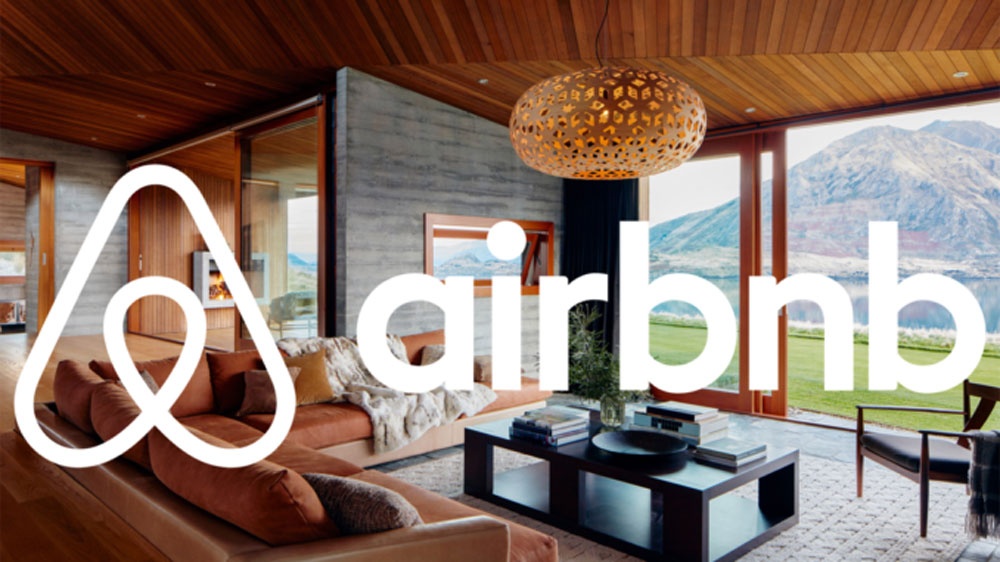

In [6]:
# Importing the necessary libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [7]:
# Reading the data
df = pd.read_csv("/content/AB_NYC_2019.csv.zip")

In [8]:
# Checking the size of the dataset
df.shape

(48895, 16)

In [9]:
# Datatypes
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [10]:
#Statistical Summary
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
# Viewing the first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
# Viewing the last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [13]:
# Column Names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Label Encoding

- To understand label-encoding, we will focus on one categorical column only

- In this technique, each label is assigned a unique integer based on alphabetical ordering

- Label Encoding is converting labels/words into numeric form
- Label encoding doesn’t affect the dimensionality of the data set



In [14]:
# Neighbourhood Group Names
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
# Creating an instance of labelencoder and storing it in an object lbl_encode
lbl_encode = LabelEncoder()

In [16]:
# Using the fit_transform function to fit
lbl_encode.fit_transform(df['neighbourhood_group'])

array([1, 2, 2, ..., 2, 2, 2])

In [17]:
# # Assigning numerical values using the LabelEncoder and storing in another column
df['neighbourhood_group_label'] = lbl_encode.fit_transform(df['neighbourhood_group'])

In [18]:
print(df['neighbourhood_group'])

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object


In [19]:
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [20]:
# Viewing the new columns

df['neighbourhood_group_label'].value_counts()



,count
neighbourhood_group_label,
2,21661
1,20104
3,5666
0,1091
4,373


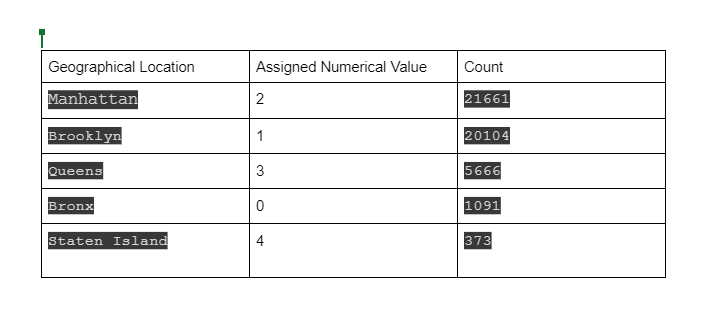

## Challenges with Label Encoding

- In the above scenario, the Location names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets.
- Due to this, there is a very high probability that the model captures the relationship between the locations such as Manhattan < Brooklyn < Queens.

- This is something that we do not want! So how can we overcome this obstacle?

- Here comes the concept of One-Hot Encoding.

## OneHot Encoding

- One-Hot Encoding is another popular technique for treating categorical variables

- It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

- One-Hot Encoding is the process of creating dummy variables.

- In this encoding technique, each category is represented as a one-hot vector

- One-hot encoding is the representation of categorical variables as binary vectors.

- One-hot encoding creates a new variable for each level in the variable whereas, in Label encoding, the levels of a variable get encoded as 1 and 0.

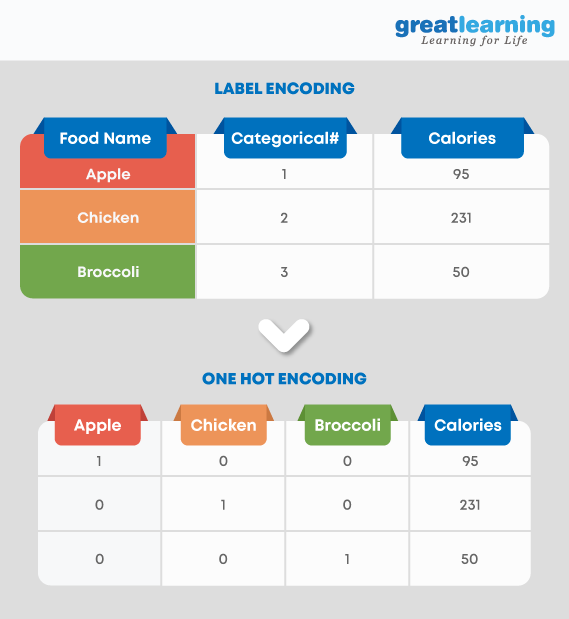

Using Get Dummies approach

In [21]:
# Creating new columns using for storage
add_columns = pd.get_dummies(df['neighbourhood_group'])

In [22]:
# Viewing the new columns
add_columns

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,False,True,False,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,True,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
48890,False,True,False,False,False
48891,False,True,False,False,False
48892,False,False,True,False,False
48893,False,False,True,False,False


In [23]:
# Join/Merge with main df on key values
df.join(add_columns).head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_label,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,1,False,True,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,2,False,False,True,False,False


In [24]:
# Dropping the Neighbourhood_group column
df.drop(['neighbourhood_group'], axis=1, inplace=True)

In [25]:
# Viewing to check that it's been dropped

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_label'],
      dtype='object')

In [26]:
# Joining with the main dataframe
df = df.join(add_columns)

In [27]:
# Viewing the first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_label,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,...,2018-10-19,0.21,6,365,1,False,True,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,...,2019-05-21,0.38,2,355,2,False,False,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,...,NaN,NaN,1,365,2,False,False,True,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,...,2019-07-05,4.64,1,194,1,False,True,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,...,2018-11-19,0.10,1,0,2,False,False,True,False,False


Using sckit learning library approach


OneHotEncoder from SciKit library only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded.

In [28]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_label', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island'],
      dtype='object')

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['neighbourhood']]).toarray())
# merge with main df bridge_df on key values
new_df = df.join(enc_df)
new_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,211,212,213,214,215,216,217,218,219,220
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
new_df.columns

Index([            'id',           'name',        'host_id',      'host_name',
        'neighbourhood',       'latitude',      'longitude',      'room_type',
                'price', 'minimum_nights',
       ...
                    211,              212,              213,              214,
                    215,              216,              217,              218,
                    219,              220],
      dtype='object', length=242)

## Challenges of One-Hot Encoding: Dummy Variable Trap

- One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.

- Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

- The Dummy Variable Trap leads to the problem known as multicollinearity.

- Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

- So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped.

- To do ; practically demonstrate how the problem of multicollinearity is introduced after carrying out the one-hot encoding.

One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

VIF=1, Very Less Multicollinearity

VIF<5, Moderate Multicollinearity

VIF>5, Extreme Multicollinearity (This is what we have to avoid)


To do: Compute the VIF scores:

In [31]:
# Function to calculate VIF


Assignment/Research Qstn

- Often times people think that one-hot encoding and dummy-encoding are exactly the same thing, but that's not entirely true.
- What do you think is the difference between the two?


In [32]:
y = bo + b1x = linear equation

y = bo + b1x + b2x2 = polynomial equation

SyntaxError: cannot assign to expression (<ipython-input-32-79cf0aadec49>, line 1)